In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_df.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CryoSleep     12970 non-null  object 
 1   Destination   12970 non-null  object 
 2   Age           12970 non-null  float64
 3   VIP           12970 non-null  object 
 4   RoomService   12970 non-null  float64
 5   FoodCourt     12970 non-null  float64
 6   ShoppingMall  12970 non-null  float64
 7   Spa           12970 non-null  float64
 8   VRDeck        12970 non-null  float64
 9   Transported   8693 non-null   float64
 10  Deck          12970 non-null  object 
 11  Side          12970 non-null  object 
 12  HomePlanet    12970 non-null  object 
dtypes: float64(7), object(6)
memory usage: 1.3+ MB


In [4]:
df = pd.get_dummies(df, drop_first=True)

In [5]:
# Data to be predicted
desired_col = df[df['Transported'].isnull()]
desired_col = desired_col.drop(['Transported'], axis = 1)

In [6]:
desired_col.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep_None,CryoSleep_True,Destination_None,Destination_PSO J318.5-22,...,Deck_E,Deck_F,Deck_G,Deck_None,Deck_T,Side_P,Side_S,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_None
8693,27.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
8694,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
8695,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
8696,38.0,0.0,6652.0,0.0,181.0,585.0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8697,20.0,10.0,0.0,635.0,0.0,0.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [7]:
#Training data
tr_data = df.copy()
tr_data = tr_data.dropna()

In [8]:
tr_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleep_None,CryoSleep_True,Destination_None,...,Deck_E,Deck_F,Deck_G,Deck_None,Deck_T,Side_P,Side_S,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_None
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [9]:
X = tr_data.drop('Transported', axis = 1)
y = tr_data['Transported']

In [10]:
y = y.astype('int64')

## Random Forest classifier

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [338]:
model = RandomForestClassifier(n_estimators=125, bootstrap=True, max_features=2, max_depth=13, criterion='entropy',
                              min_samples_split=4, n_jobs=-1) #oob_score=True

In [339]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=13, max_features=2,
                       min_samples_split=4, n_estimators=125, n_jobs=-1)

In [340]:
preds = model.predict(X_test)

In [341]:
## Оценка работы модели

from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [342]:
confusion_matrix(y_test,preds)

array([[528, 119],
       [131, 526]], dtype=int64)

C:\Users\79852\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


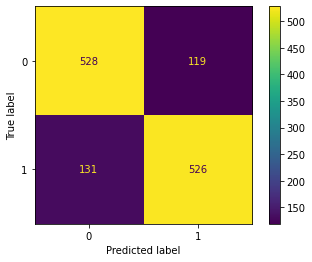

In [343]:
plot_confusion_matrix(model,X_test,y_test)

In [344]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       647
           1       0.82      0.80      0.81       657

    accuracy                           0.81      1304
   macro avg       0.81      0.81      0.81      1304
weighted avg       0.81      0.81      0.81      1304



In [287]:
model.feature_importances_

array([0.1062683 , 0.12221889, 0.09802739, 0.0807541 , 0.130029  ,
       0.11781707, 0.00510022, 0.1176112 , 0.00021829, 0.00750005,
       0.01566933, 0.00555032, 0.00445424, 0.01508326, 0.01277772,
       0.00597889, 0.01663926, 0.02306162, 0.02062877, 0.00232555,
       0.00023825, 0.01324135, 0.01283435, 0.03747155, 0.02821747,
       0.00028357])

In [290]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])\
.sort_values('Feature Importance', ascending=False)

,Feature Importance
Spa,0.130029
RoomService,0.122219
VRDeck,0.117817
CryoSleep_True,0.117611
Age,0.106268
FoodCourt,0.098027
ShoppingMall,0.080754
HomePlanet_Europa,0.037472
HomePlanet_Mars,0.028217
Deck_F,0.023062


In [300]:
test_error = []

for n in range(100,150):
    # Используем n случайных деревьев
    model = RandomForestClassifier(n_estimators=n, bootstrap=True, max_features=2, max_depth=13, criterion='entropy',
                              min_samples_split=4, n_jobs=-1)
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

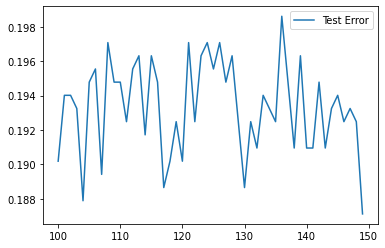

In [302]:
plt.plot(range(100,150),test_error,label='Test Error')
plt.legend()

In [270]:
final_model = RandomForestClassifier(n_estimators=128, bootstrap=True, max_features=2, max_depth=13, criterion='entropy',
                              min_samples_split=4, n_jobs=-1)

In [271]:
final_model.fit(X, y)

RandomForestClassifier(criterion='entropy', max_depth=13, max_features=2,
                       min_samples_split=4, n_estimators=128, n_jobs=-1)

In [272]:
final_pred = final_model.predict(X)

In [273]:
print(classification_report(y,final_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4315
           1       0.87      0.86      0.86      4378

    accuracy                           0.86      8693
   macro avg       0.86      0.86      0.86      8693
weighted avg       0.86      0.86      0.86      8693



In [274]:
result = final_model.predict(desired_col)

In [275]:
test = pd.read_csv('test.csv')

In [276]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Transported':result})
submission['Transported'] = submission['Transported'].astype(int)
print(submission.shape)

(4277, 2)


In [277]:
submission['Transported'].value_counts()

0    2197
1    2080
Name: Transported, dtype: int64

In [278]:
submission['Transported'] = submission['Transported'].astype('bool')

In [279]:
filename = 'space_preds.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: space_preds.csv
